### Bins

In [1]:
import statistics
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
L = [35, 21, 10, 37, 19, 21, 41, 13, 62, 66, 73, 64, 20, 39,58, 72,13,34,33,11]

### Bin Width

In [3]:
def equalWith(lis,numBin):
    minNum = min(lis)
    w = (max(lis)-min(lis))/numBin
    index = 0
    upper = minNum+w
    temp = []
    res = []
    while index < len(lis):
        if lis[index]<= upper:
            temp.append(lis[index])
        else:
            upper += w
            res.append(temp)
            temp = [lis[index]]
        index+=1
    if temp:
        res.append(temp)
    return res

In [4]:
L = sorted(L)
t32 = equalWith(L,3) # equal with with three bin
t32

[[10, 11, 13, 13, 19, 20, 21, 21],
 [33, 34, 35, 37, 39, 41],
 [58, 62, 64, 66, 72, 73]]

In [5]:
## smooth by mean
t32_fin = [[round(statistics.mean(x),6) for y in x] for x in t32]
t32_fin

[[16, 16, 16, 16, 16, 16, 16, 16],
 [36.5, 36.5, 36.5, 36.5, 36.5, 36.5],
 [65.833333, 65.833333, 65.833333, 65.833333, 65.833333, 65.833333]]

In [6]:
t33 = equalWith(L,4)
t33

[[10, 11, 13, 13, 19, 20, 21, 21],
 [33, 34, 35, 37, 39, 41],
 [58],
 [62, 64, 66, 72, 73]]

In [7]:
def equalWith_Smooth(lis,numBin):
    minNum = min(lis)
    w = (max(lis)-min(lis))/numBin
    index = 0
    lower = minNum
    upper = minNum+w
    temp = []
    res = []
    while index < len(lis):
        if lis[index]<= upper: 
            if abs(lis[index]-lower)<=abs(lis[index]-upper):
                temp.append(lower)
            else:
                temp.append(upper)
        else:
            lower = upper
            upper += w
            res.append(temp) 
            temp = []
            if abs(lis[index]-lower)<=abs(lis[index]-upper):
                temp.append(lower)
            else:
                temp.append(upper)
            
        index+=1
    if temp:
        res.append(temp)
    return res

In [8]:
weight = (max(L)-min(L))/4

for i in range(1,4):
    print("boundaries are: ", min(L)+i*weight)

boundaries are:  25.75
boundaries are:  41.5
boundaries are:  57.25


In [9]:
equalWith(L,4)

[[10, 11, 13, 13, 19, 20, 21, 21],
 [33, 34, 35, 37, 39, 41],
 [58],
 [62, 64, 66, 72, 73]]

In [10]:
equalWith_Smooth(L,4)

[[10, 10, 10, 10, 25.75, 25.75, 25.75, 25.75],
 [25.75, 41.5, 41.5, 41.5, 41.5, 41.5],
 [57.25],
 [57.25, 57.25, 73.0, 73.0, 73.0]]

### Bin Depth

In [11]:
def EqualDepth(lis,numBin):
    leng = len(lis)//numBin
    temp = []
    res = []
    
    for i in range(len(lis)):
        if len(temp) == leng:
            mint = min(temp)
            maxt = max(temp)
            j = 0
            for x in temp:
                if abs(x-mint)<=abs(x-maxt):
                    temp[j] = mint
                else:
                    temp[j] = maxt
                j+=1
            res.append(temp)
            temp = [lis[i]]
        else:
            temp.append(lis[i])
    if temp:
        j=0
        mint = min(temp)
        maxt = max(temp)
        for x in temp:
                if abs(x-mint)<=abs(x-maxt):
                    temp[j] = mint
                else:
                    temp[j] = maxt
                j+=1
        res.append(temp)
    return res

In [12]:
EqualDepth(L,4)

[[10, 10, 10, 10, 19],
 [20, 20, 20, 34, 34],
 [35, 35, 35, 35, 58],
 [62, 62, 62, 73, 73]]

# Data Analysis

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("medical.csv")

In [15]:
df.head()

,rec_id,ssn,first_name,middle_name,last_name,gender,age_at_consultation,birth_date,medicare_number,street_address,...,email,marital_status,height,weight,bmi,blood_pressure,cholesterol_level,smoking_status,clinical_notes,consultation_timestamp
0,rec-72650,g133553277,jay,lewis,ramsey,f,61,27/2/1953,1022 46547 2 2,275 east arm road kananda,...,ibijbqfmmk@mail.com.au,married,188,124,35,75,283,1,forehead-laceration,2014-03-14t07:08+00:00
1,rec-92184,f147122774,enrico,james,crowder,f,54,13/2/1961,1313 62527 2 1,172 riley street apt 710,...,NaN,married,180,122,37,75,142,0,urinary-frequency,2015-01-20t01:07+00:00
2,rec-1678,b148374977,marina,w,gore,f,59,2/9/1955,1195 67342 1 2,250 the hatch road pilliga,...,tbcnmjefsf@mail.com,married,177,-99,30,73,95,0,watery-eyes,2014-12-21t23:56+00:00
3,rec-15841,h170455232,jerry,winson,ward,m,23,21/3/1993,5017 24775 2 3,18 atoli rise pacific pines,...,ward.jerry@gmail.com,married,195,86,22,75,174,0,anxiety,2016-04-18t06:13+00:00
4,rec-7412,g155552142,melissa,marie,overstreet,f,33,16/11/1983,8445 91110 2 1,868 old calder highway keilor retirement...,...,NaN,married-de-facto,177,114,36,70,81,1,stomach-virus,2016-12-05t13:56+00:00


#### Paterns

In [16]:
# Generate a dataframe with 0 for missing and 1 for present values for the three columns
missingness = df[['postcode', 'phone', 'email']].notnull().astype('int')

# Group by unique rows and count occurrences to identify patterns
pattern_counts = missingness.groupby(['postcode', 'phone', 'email']).size().reset_index(name='Counts')

print(pattern_counts)

   postcode  phone  email  Counts
0         0      0      0     484
1         0      0      1    1140
2         0      1      0     704
3         0      1      1    1643
4         1      0      0    1961
5         1      0      1    4391
6         1      1      0    2866
7         1      1      1    6811


### Missing

In [17]:
# Calculate Pearson's correlation coefficient
correlation_value = df['bmi'].corr(df['age_at_consultation'])

# Print the correlation value rounded to two decimal places
print(round(correlation_value, 2))

0.25


In [18]:
df.corr()

,age_at_consultation,postcode,height,weight,bmi,blood_pressure,cholesterol_level,smoking_status
age_at_consultation,1.000000,0.005286,0.530255,0.199850,0.253058,0.043564,-0.005343,0.077423
postcode,0.005286,1.000000,0.018540,0.001319,-0.005541,0.005431,-0.015539,-0.000195
height,0.530255,0.018540,1.000000,0.253186,0.137161,0.026161,-0.007193,0.105651
weight,0.199850,0.001319,0.253186,1.000000,0.390436,0.014561,-0.009506,0.052296
bmi,0.253058,-0.005541,0.137161,0.390436,1.000000,0.021735,-0.007764,0.045618
blood_pressure,0.043564,0.005431,0.026161,0.014561,0.021735,1.000000,0.010511,0.008379
cholesterol_level,-0.005343,-0.015539,-0.007193,-0.009506,-0.007764,0.010511,1.000000,0.004033
smoking_status,0.077423,-0.000195,0.105651,0.052296,0.045618,0.008379,0.004033,1.000000


In [19]:
import scipy.stats as ss

# create the contingency table
contingency_table = pd.crosstab(df['state'], df['marital_status'])

# calculate the chi-square test statistic
chi2, _, _, _ = ss.chi2_contingency(contingency_table)

# calculate the minimum of the number of categories in the two variables
min_categories = min(contingency_table.shape[0], contingency_table.shape[1])

# calculate Cramer's V coefficient
n = contingency_table.sum().sum()
V = np.sqrt(chi2 / (n * (min_categories - 1)))
print("categrorical corr: ", round(V,2))

categrorical corr:  0.02


#### Completeness

In [20]:
# Completeness for middle name
middle_name_completeness = (df['middle_name'].notna().sum() / len(df)) * 100

# Completeness for email
email_completeness = (df['email'].notna().sum() / len(df)) * 100

print(f"Middle Name Completeness: {round(middle_name_completeness, 2)}%")
print(f"Email Completeness: {round(email_completeness, 2)}%")

Middle Name Completeness: 90.06%
Email Completeness: 69.92%


In [21]:
df['middle_name'].notna().sum()

18012

#### Validity

In [22]:
# Validity for weight (assuming positive values are valid)
weight_validity = (df[df['weight'] > 0]['weight'].count() / df['weight'].notna().sum()) * 100

# Validity for email (checking for '@' symbol)
email_validity = (df[df['email'].str.contains('@', na=False)]['email'].count() / df['email'].notna().sum()) * 100

print(f"Weight Validity: {round(weight_validity, 2)}%")
print(f"Email Validity: {round(email_validity, 2)}%")

Weight Validity: 89.98%
Email Validity: 85.71%


#### Uniqueness

In [23]:
# Uniqueness for first name
first_name_uniqueness = (df['first_name'].nunique() / len(df)) * 100

print(f"First Name Uniqueness: {round(first_name_uniqueness, 2)}%")

First Name Uniqueness: 18.65%


In [24]:
# Filter out blank values (assuming NaN or empty strings as blanks)
non_blank_df = df[df['first_name'].notna() & (df['first_name'] != '')]

# Calculate the uniqueness percentage excluding blanks
first_name_uniqueness_x = (non_blank_df['first_name'].nunique() / len(non_blank_df)) * 100
first_name_uniqueness_x

18.65

In [25]:
len(df[df['first_name'].notna()])

20000

In [26]:
non_blank_df['first_name'].nunique()

3730

In [27]:
non_blank_df['first_name'].nunique() / len(non_blank_df)

0.1865

#### Consistency

In [28]:
pd.to_datetime(df['consultation_timestamp'].str.split('t').str[0])

0       2014-03-14
1       2015-01-20
2       2014-12-21
3       2016-04-18
4       2016-12-05
           ...    
19995   2011-06-09
19996   2013-04-26
19997   2020-05-04
19998   2015-08-12
19999   2015-04-07
Name: consultation_timestamp, Length: 20000, dtype: datetime64[ns]

In [29]:
# Convert birth_date and consultation_timestamp to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%d/%m/%Y')
df['consultation_timestamp'] = pd.to_datetime(df['consultation_timestamp'].str.split('t').str[0])

# Extract the year from 'consultation_timestamp' and 'birth_date'
df['consultation_year'] = df['consultation_timestamp'].dt.year
df['birth_year'] = df['birth_date'].dt.year

# Calculate expected age at consultation
df['expected_age'] = df['consultation_year'] - df['birth_year']

# Calculate consistency: 1 for consistent, 0 for inconsistent
df['consistency'] = (df['age_at_consultation'] == df['expected_age']).astype(int)

# Calculate consistency rate
consistency_rate = df['consistency'].mean() * 100
print(f"Consistency rate: {consistency_rate:.2f}%")

Consistency rate: 89.95%


#### Distribution

In [30]:
# Cleaning medicare_number column
df['medicare_number'].str.replace(r'\D', '', regex=True).astype(str)

0        10224654722
1        13136252721
2        11956734212
3        50172477523
4        84459111021
            ...     
19995    12714369822
19996    92239591413
19997    82597274012
19998    16183293823
19999    77255140511
Name: medicare_number, Length: 20000, dtype: object

In [31]:
def extract_first_digit(n):
    try:
        return int(str(n)[0])
    except ValueError:
        return None

def benford_percentage(digit):
    return np.log10(1 + 1/digit) * 100

df['cholesterol_first_digit'] = df['cholesterol_level'].dropna().apply(extract_first_digit)
df['blood_pressure_first_digit'] = df['blood_pressure'].dropna().apply(extract_first_digit)
df['medicare_first_digit'] = df['medicare_number'].str.replace(" ", "").dropna().apply(extract_first_digit)  # removing spaces to get the actual first digit

cholesterol_distribution = df['cholesterol_first_digit'].value_counts(normalize=True).sort_index() * 100
blood_pressure_distribution = df['blood_pressure_first_digit'].value_counts(normalize=True).sort_index() * 100
medicare_distribution = df['medicare_first_digit'].value_counts(normalize=True).sort_index() * 100

In [32]:
benford = [benford_percentage(i) for i in range(1,10)]

In [33]:
def describe_distribution(distribution, attribute_name):
    # Ensure distribution only contains values for digits 1-9
    aligned_distribution = [distribution.get(i, 0) for i in range(1, 10)]
    diff = np.array(aligned_distribution) - np.array(benford)
    
    if abs(diff).sum() < 15:  # a somewhat arbitrary threshold
        return f"The distribution of the first digits for {attribute_name} seems to follow Benford's law."
    else:
        return f"The distribution of the first digits for {attribute_name} does not follow Benford's law."

print(describe_distribution(cholesterol_distribution, 'cholesterol level'))
print(describe_distribution(blood_pressure_distribution, 'blood pressure'))
print(describe_distribution(medicare_distribution, 'medicare number'))

The distribution of the first digits for cholesterol level does not follow Benford's law.
The distribution of the first digits for blood pressure does not follow Benford's law.
The distribution of the first digits for medicare number does not follow Benford's law.


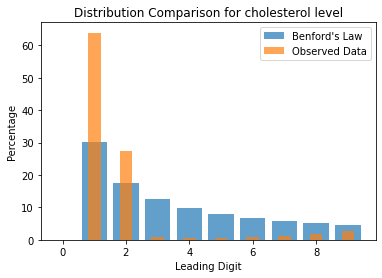

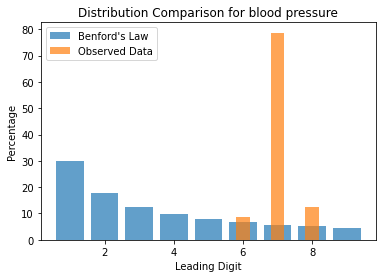

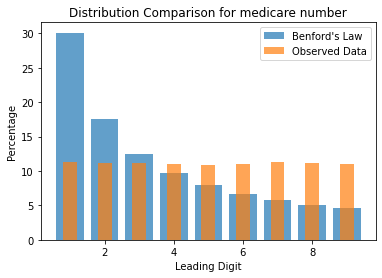

In [34]:
import matplotlib.pyplot as plt

def plot_distribution(distribution, attribute_name):
    # Expected Benford's Law percentages for leading digits 1-9
    benford = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
    
    fig, ax = plt.subplots()

    # Plotting expected Benford distribution
    ax.bar(range(1,10), benford, alpha=0.7, label="Benford's Law")

    # Plotting the observed distribution
    distribution = distribution.sort_index() # Ensuring the index is sorted
    ax.bar(distribution.index, distribution.values, alpha=0.7, width=0.4, align='center', label='Observed Data')

    ax.set_xlabel('Leading Digit')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Distribution Comparison for {attribute_name}')
    ax.legend()

    plt.show()

# Plotting for each attribute
plot_distribution(cholesterol_distribution, 'cholesterol level')
plot_distribution(blood_pressure_distribution, 'blood pressure')
plot_distribution(medicare_distribution, 'medicare number')

In [35]:
print("cholesterol_distribution \n" , cholesterol_distribution)
print("blood_pressure_distribution \n", blood_pressure_distribution)
print("medicare_distribution \n", medicare_distribution)

cholesterol_distribution 
 0     0.005
1    63.935
2    27.510
3     0.755
4     0.520
5     0.570
6     0.845
7     1.200
8     1.935
9     2.725
Name: cholesterol_first_digit, dtype: float64
blood_pressure_distribution 
 5     0.005
6     8.770
7    78.715
8    12.490
9     0.020
Name: blood_pressure_first_digit, dtype: float64
medicare_distribution 
 1    11.260
2    11.175
3    11.210
4    11.075
5    10.810
6    10.995
7    11.270
8    11.145
9    11.060
Name: medicare_first_digit, dtype: float64


In [36]:
cholesterol_distribution = (df['cholesterol_first_digit'].value_counts(normalize=True).sort_index() * 100).round(1).astype(str) + '%'
blood_pressure_distribution = (df['blood_pressure_first_digit'].value_counts(normalize=True).sort_index() * 100).round(1).astype(str) + '%'
medicare_distribution = (df['medicare_first_digit'].value_counts(normalize=True).sort_index() * 100).round(1).astype(str) + '%'

In [37]:
print("cholesterol_distribution \n" , cholesterol_distribution)
print("blood_pressure_distribution \n", blood_pressure_distribution)
print("medicare_distribution \n", medicare_distribution)

cholesterol_distribution 
 0     0.0%
1    63.9%
2    27.5%
3     0.8%
4     0.5%
5     0.6%
6     0.8%
7     1.2%
8     1.9%
9     2.7%
Name: cholesterol_first_digit, dtype: object
blood_pressure_distribution 
 5     0.0%
6     8.8%
7    78.7%
8    12.5%
9     0.0%
Name: blood_pressure_first_digit, dtype: object
medicare_distribution 
 1    11.3%
2    11.2%
3    11.2%
4    11.1%
5    10.8%
6    11.0%
7    11.3%
8    11.1%
9    11.1%
Name: medicare_first_digit, dtype: object
